<a href="https://colab.research.google.com/github/nahum0804/NeuralProhphet_WeatherPrediction/blob/main/NeuralProphet_FutureRegressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install neuralprophet[live]

In [ ]:
import os
import kagglehub
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter
from neuralprophet import NeuralProphet
import numpy as np
import pandas as pd

In [ ]:
var = "apparent_temperature" # Variable a predecir si quieremos predecir otra se cambia aca y en la seleccion de prediccion de los modelos
folder_path = f'./{var}'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

cols = ['timestamp', 'apparent_temperature', 'air_temperature',
        'dew_point_temperature', 'relative_humidity', 'wind_speed', 'wind_direction']

# Definir la ruta del archivo CSV dentro del dataset
file_path = "weather_data.csv"  # Ajusta esta ruta según el dataset

# Cargar el dataset sin los parámetros usecols y parse_dates
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "cdaclab/unicon",  # Reemplaza con el nombre correcto del dataset
    file_path
).head(5000000)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-17-8cb53a584a31>:13: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(

  df = kagglehub.load_dataset(



**Agrupar por horas los datos**

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df_hourly = df.groupby([
    pd.Grouper(key='timestamp', freq='H')
]).mean().reset_index()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-18-a89ee8f112b4>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.Grouper(key='timestamp', freq='H')

  pd.Grouper(key='timestamp', freq='H')



In [ ]:
df["ds"] = df_hourly["timestamp"]

In [ ]:
df["y"] = df["apparent_temperature"]

In [ ]:
df.drop(columns=["timestamp", "apparent_temperature", "wind_speed", "wind_direction", "campus_id"], inplace=True)

In [ ]:
regresores = ['air_temperature', 'dew_point_temperature',
              'relative_humidity']

In [ ]:
df.dropna(subset=['ds', 'y'] + regresores, inplace=True)

In [ ]:
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

train_df['ds'] = pd.to_datetime(train_df['ds'])
train_df['y'] = pd.to_numeric(train_df['y'])

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-24-42a7125179a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ds'] = pd.to_datetime(train_df['ds'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ds'] = pd.to_datetime(train_df['ds'])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-24-42a7125179a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
modelosregresores = {}
historiales_regresores = {}

def generar_modelos_regresores():
    for reg in regresores:
        df_reg = train_df[['ds', reg]].rename(columns={reg: 'y'}).dropna()
        df_reg['ds'] = pd.to_datetime(df_reg['ds'])

        modelo = NeuralProphet(epochs=100, batch_size=32, n_changepoints=20)
        modelo.fit(df_reg, freq='H')

        modelosregresores[reg] = modelo
        historiales_regresores[reg] = df_reg


In [ ]:
generar_modelos_regresores()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFrame(pd.date

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/262 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFrame(pd.date

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/262 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFrame(pd.date

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/262 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
def predecir_regresores(fechas:pd.DataFrame):
    #fechas['ds'] = pd.to_datetime(fechas['ds'])

    for reg in regresores:
        modelo = modelosregresores[reg]
        historial = historiales_regresores[reg]

        future_df = modelo.make_future_dataframe(
            df=historial,
            periods=len(fechas),
            n_historic_predictions=False
        )

        predicciones = modelo.predict(future_df)
        fechas[reg] = predicciones['yhat1'].values

    return fechas

In [ ]:
model_final = NeuralProphet(epochs=100, batch_size=32, n_changepoints=30)
model_final.set_plotting_backend("plotly-static")

for reg in regresores:
    model_final.add_future_regressor(reg)

In [ ]:
ultima_fecha = train_df['ds'].max()

pasos_futuros = len(test_df)

fechas_futuras = pd.DataFrame({
    'ds': pd.date_range(start=ultima_fecha + pd.Timedelta(hours=1), periods=pasos_futuros, freq='H')
})

WARNING - (py.warnings._showwarnmsg) - <ipython-input-29-0c4aed0b50a9>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'ds': pd.date_range(start=ultima_fecha + pd.Timedelta(hours=1), periods=pasos_futuros, freq='H')

  'ds': pd.date_range(start=ultima_fecha + pd.Timedelta(hours=1), periods=pasos_futuros, freq='H')



In [ ]:
print("Min date in fechas_futuras: " + str(fechas_futuras['ds'].min()))
print("Max date in fechas_futuras: " + str(fechas_futuras['ds'].max()))

Min date in fechas_futuras: 2021-06-18 19:00:00
Max date in fechas_futuras: 2022-04-30 23:00:00


In [ ]:
future_regressors_df = predecir_regresores(fechas_futuras)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-p

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFram

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFram

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
print("Min date in future_regressors: " + str(future_regressors_df['ds'].min()))
print("Max date in future_regressors: " + str(future_regressors_df['ds'].max()))

Min date in future_regressors: 2021-06-18 19:00:00
Max date in future_regressors: 2022-04-30 23:00:00


In [ ]:
future_df = model_final.make_future_dataframe(
    df=train_df,
    periods=len(test_df),
    regressors_df=future_regressors_df,
    n_historic_predictions=False
)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as h
INFO:NP.df_utils:Dataframe freq automatically defined as h
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
def generar_forecast(modelo, train_df, test_df):
    model_final.fit(train_df, freq='h', validation_df=test_df)

    fechas_futuras = pd.DataFrame({
        'ds': pd.date_range(
            start=train_df['ds'].max() + pd.Timedelta(hours=1),
            periods=len(test_df),
            freq='H'
        )
    })

    future_regressors_df = predecir_regresores(fechas_futuras)

    future_df = modelo.make_future_dataframe(
        df=train_df,
        periods=len(test_df),
        regressors_df=future_regressors_df,
        n_historic_predictions=False
    )

    return modelo.predict(future_df)

In [ ]:
forecast =  generar_forecast(model_final, train_df, test_df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/262 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - <ipython-input-34-969a006a6229>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'ds': pd.date_range(

  'ds': pd.date_range(

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.D

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFram

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFram

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.in

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


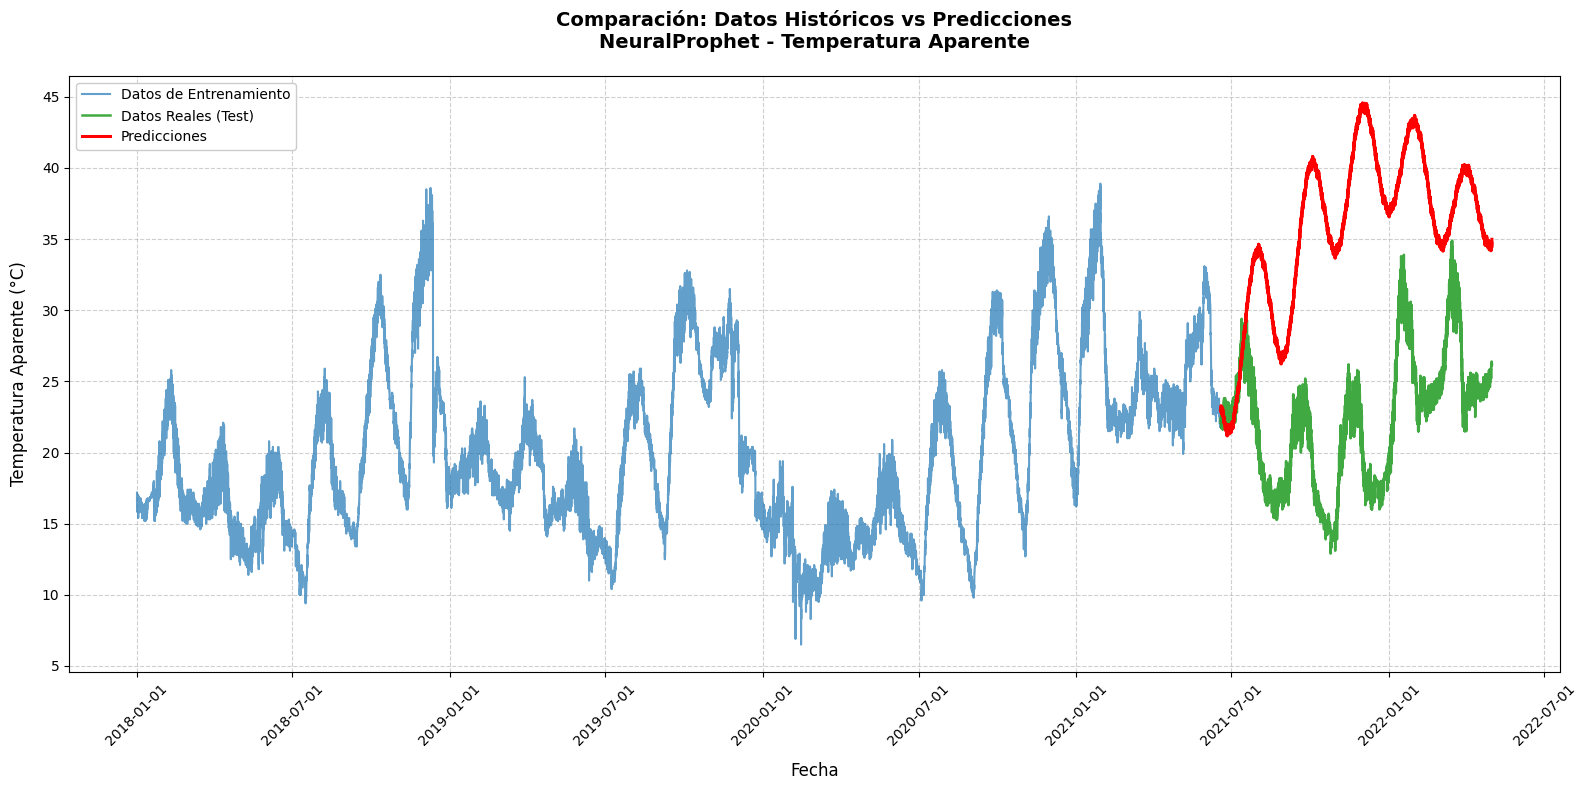

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(16, 8))

plt.plot(train_df['ds'], train_df['y'],
         label='Datos de Entrenamiento',
         color='#1f77b4',
         alpha=0.7,
         linewidth=1.5)

plt.plot(test_df['ds'], test_df['y'],
             label='Datos Reales (Test)',
             color='#2ca02c',
             alpha=0.9,
             linewidth=1.8)

plt.plot(forecast['ds'], forecast['yhat1'],
         label='Predicciones',
         color='#ff0000',
         linestyle='solid',
         linewidth=2.2)

# Configuración del gráfico
plt.title('Comparación: Datos Históricos vs Predicciones\nNeuralProphet - Temperatura Aparente',
          pad=20,
          fontsize=14,
          fontweight='bold')

plt.xlabel('Fecha', fontsize=12, labelpad=10)
plt.ylabel('Temperatura Aparente (°C)', fontsize=12, labelpad=10)

# Mejorar formato de fechas
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Leyenda y grid
plt.legend(loc='upper left', fontsize=10, framealpha=1)
plt.grid(True, linestyle='--', alpha=0.6)

# Rotar fechas y ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()